In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os


In [2]:
#os.listdir('data')
#os.listdir('data/davinci_003/Baseline Questions')
os.listdir('data/gpt_3.5_turbo/Baseline Questions/')

['Test_chat_6_23_23.csv', 'Test_chat3_6_23_23.csv', 'Test_chat2_6_23_23.csv']

## Do analysis on Baseline model data collected 

### load data

In [3]:
df1 = pd.read_json('data/autocast_questions.json')

In [4]:
df_davinci_1 = pd.read_csv('data/davinci_003/Baseline Questions/Test_2_6_22_23.csv')
print(df_davinci_1.shape)

(3000, 7)


In [5]:
"""Drop NaN answers for Metrics"""
df_davinci_1.dropna(inplace = True)
print(df_davinci_1.shape)

(1732, 7)


In [6]:
df_davinci_1.head()

,Unnamed: 0,ID,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer
2,2,M4571,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.15192857142857102,max
4,4,M4027,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.2,min
5,5,G1758,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,The Republican Party candidate,someone else
6,6,M4035,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no
7,7,M900,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no


In [7]:
df_davinci_1['Base Answer']= df_davinci_1['Base Answer'].str.strip()
df_davinci_1['Base Answer']= df_davinci_1['Base Answer'].str.strip('.')
df_davinci_1['Base Answer']= df_davinci_1['Base Answer'].str.lower()

df_davinci_1['Answer']= df_davinci_1['Answer'].str.strip()
df_davinci_1['Answer']= df_davinci_1['Answer'].str.strip('.')
df_davinci_1['Answer']= df_davinci_1['Answer'].str.lower()

In [8]:
df_davinci_1['acc'] = df_davinci_1['Answer']==df_davinci_1['Base Answer']

In [9]:
df_davinci_1.head(10)

,Unnamed: 0,ID,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer,acc
2,2,M4571,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.15192857142857102,max,False
4,4,M4027,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.2,min,False
5,5,G1758,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,the republican party candidate,someone else,False
6,6,M4035,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True
7,7,M900,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True
8,8,M3028,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.49,max,False
10,10,C46,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True
11,11,M184,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,yes,no,False
15,15,M7069,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True
17,17,M6855,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.17455764840182603,none of the above,False


<Axes: title={'center': 'Davinci_003 Question Accuracy: 45% (subset of all questions)'}>

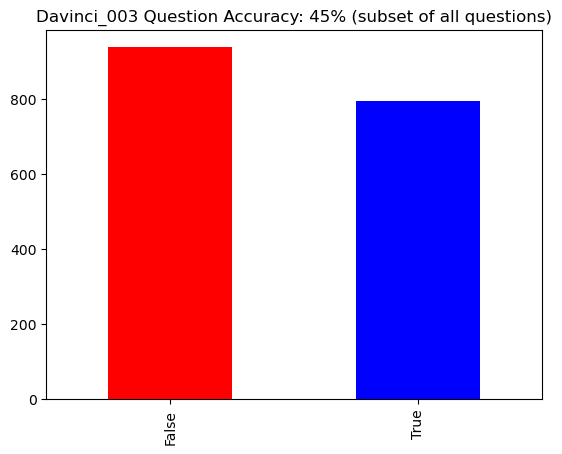

In [46]:
df_davinci_1['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'Davinci_003 Question Accuracy: 45% (subset of all questions)')



<Axes: title={'center': 'Davinci_003 Question Accuracy: 20% \n(After 10/2022)'}>

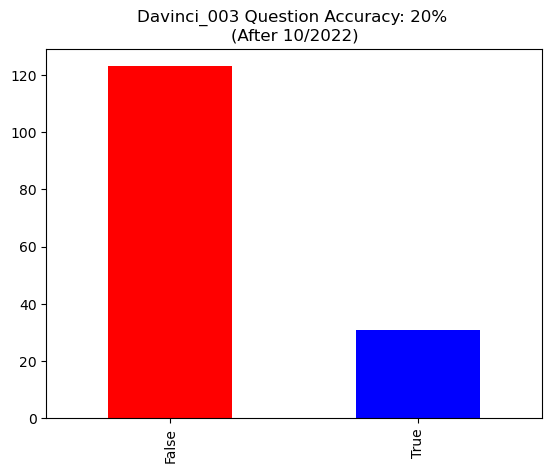

In [60]:
df_davinci_1[df_davinci_1['Leakage Status Open'] == False]['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'Davinci_003 Question Accuracy: 20% \n(After 10/2022)')


<Axes: title={'center': 'Davinci_003 Question Accuracy: 48% \n(After 10/2022)'}>

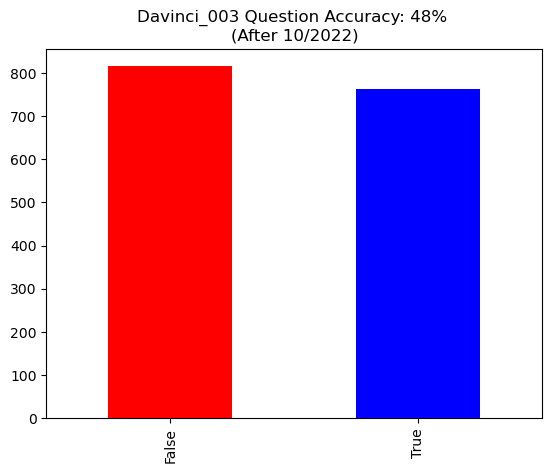

In [63]:
df_davinci_1[df_davinci_1['Leakage Status Open'] == True]['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'Davinci_003 Question Accuracy: 48% \n(After 10/2022)')

In [11]:
df_davinci_1['acc'].value_counts()

False    938
True     794
Name: acc, dtype: int64

## Data Leakage Metrics 

<Axes: title={'center': 'Davinci_003 Question Accuracy: 48% \n(Before 10/2022)'}>

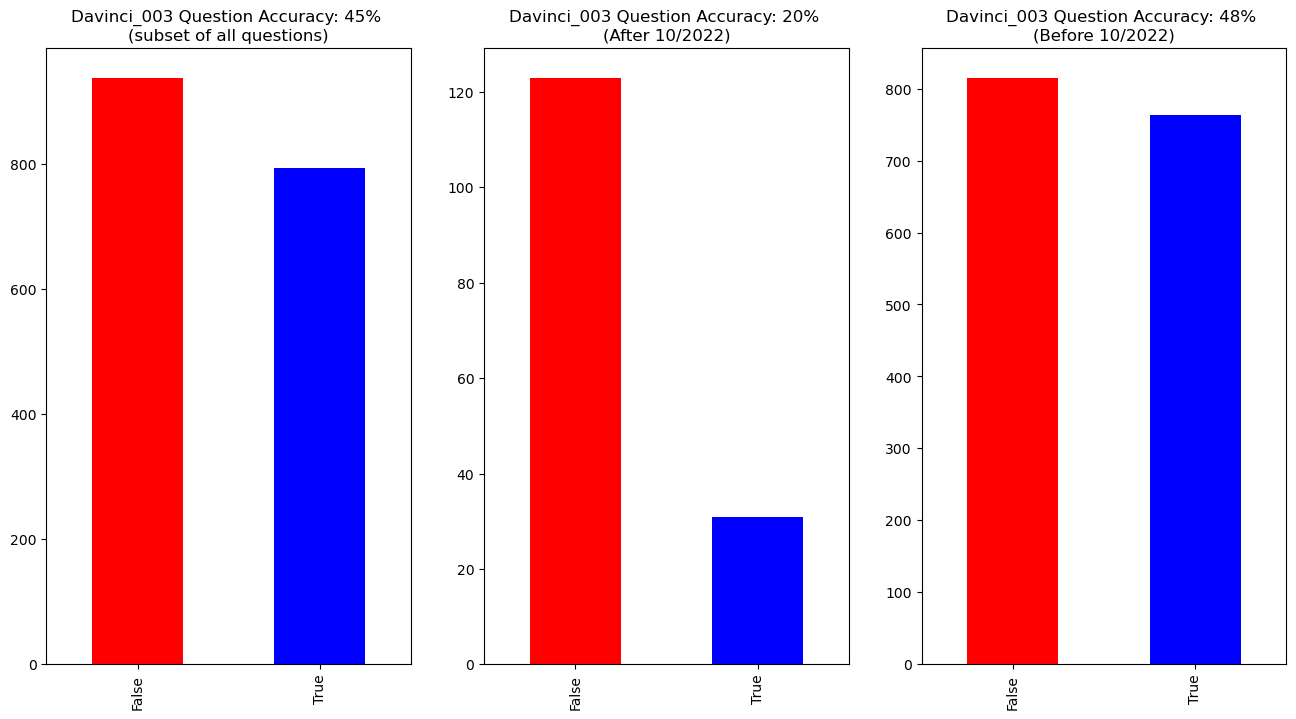

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (16,8))

#add DataFrames to subplots
df_davinci_1['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'Davinci_003 Question Accuracy: 45% \n(subset of all questions)', ax = axes[0])

df_davinci_1[df_davinci_1['Leakage Status Open'] == False]['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'Davinci_003 Question Accuracy: 20% \n(After 10/2022)', ax = axes[1])

df_davinci_1[df_davinci_1['Leakage Status Open'] == True]['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'Davinci_003 Question Accuracy: 48% \n(Before 10/2022)', ax = axes[2])


<Axes: title={'center': 'GPT_3.5_Turbo Question Accuracy: 43.5% \n(Before 10/2022)'}>

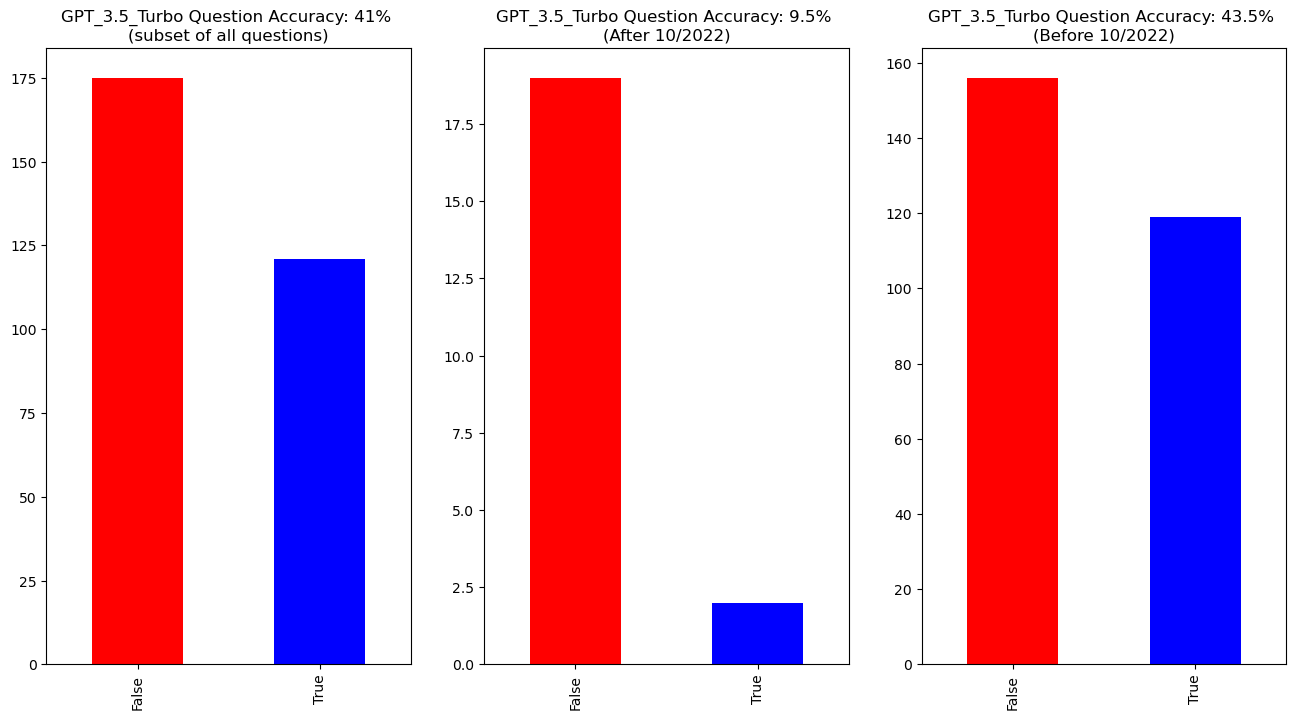

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (16,8))

#add DataFrames to subplots
df_gpt_35['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'GPT_3.5_Turbo Question Accuracy: 41% \n(subset of all questions)', ax = axes[0])

df_gpt_35[df_gpt_35['Leakage Status Open'] == False]['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'GPT_3.5_Turbo Question Accuracy: 9.5% \n(After 10/2022)', ax = axes[1])

df_gpt_35[df_gpt_35['Leakage Status Open'] == True]['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'GPT_3.5_Turbo Question Accuracy: 43.5% \n(Before 10/2022)', ax = axes[2])


In [73]:
121/(121+175)

0.40878378378378377

In [71]:
119/(119+156)

0.43272727272727274

In [12]:
pct = df_davinci_1['acc'].value_counts()[1]/df_davinci_1['acc'].value_counts()[:].sum()

print('percentage correc davinci: ', pct*100, ' %')

percentage correc davinci:  45.842956120092374  %


In [13]:
df_gpt_35_1 = pd.read_csv('data/gpt_3.5_turbo/Baseline Questions/Test_chat3_6_23_23.csv')
print(df_gpt_35_1.shape)

(500, 7)


In [14]:
"""Drop NaN answers for metrics"""
df_gpt_35_1.dropna(inplace = True)
print(df_gpt_35_1.shape)

(292, 7)


In [15]:
df_gpt_35_1.head()

,Unnamed: 0,ID,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer
0,0,M5990,verbose=False callbacks=None callback_manager=...,True,True,0.537899999999999,"i'm sorry, but as an ai language model, i cann..."
1,1,M5904,verbose=False callbacks=None callback_manager=...,True,True,0.494224422442244,"i'm sorry, but i cannot answer that question w..."
2,2,G1822,verbose=False callbacks=None callback_manager=...,True,False,no,no.
3,3,G391,verbose=False callbacks=None callback_manager=...,True,True,yes,yes.
8,8,G2045,verbose=False callbacks=None callback_manager=...,True,False,yes,yes.


In [16]:
# Prepare Answer and base Answer for comparison

In [17]:
df_gpt_35_1['Base Answer']= df_gpt_35_1['Base Answer'].str.strip('.')
df_gpt_35_1['Base Answer']= df_gpt_35_1['Base Answer'].str.strip()
df_gpt_35_1['Base Answer']= df_gpt_35_1['Base Answer'].str.lower()

df_gpt_35_1['Answer']= df_gpt_35_1['Answer'].str.strip('.')
df_gpt_35_1['Answer']= df_gpt_35_1['Answer'].str.strip()
df_gpt_35_1['Answer']= df_gpt_35_1['Answer'].str.lower()

In [18]:
df_gpt_35_1['acc'] = df_gpt_35_1['Answer']==df_gpt_35_1['Base Answer']

<Axes: >

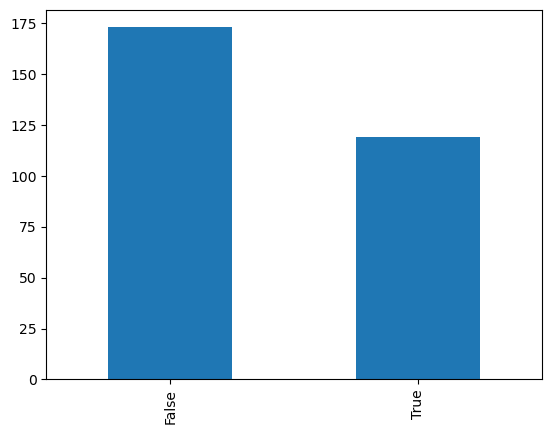

In [19]:
df_gpt_35_1['acc'].value_counts().plot(kind = 'bar')

In [20]:
df_gpt_35_1['acc'].value_counts()

False    173
True     119
Name: acc, dtype: int64

In [21]:
pct = df_gpt_35_1['acc'].value_counts()[1]/df_gpt_35_1['acc'].value_counts()[:].sum()

print('percentage correc gpt_3.5_turbo: ', pct*100, ' %')

percentage correc gpt_3.5_turbo:  40.75342465753425  %


In [22]:
df_davinci_1.rename({'ID':'id'}, axis = 'columns', inplace = True)
df_gpt_35_1.rename({'ID':'id'}, axis = 'columns', inplace = True)

In [23]:
## Merge DataFrames

In [24]:
df_gpt_35 = df_gpt_35_1.merge(df1, on = 'id')

In [25]:
df_davinci = df_davinci_1.merge(df1, on = 'id')

In [26]:
print(df_gpt_35_1['id'].dtype, df1['id'].dtype, df_davinci_1['id'].dtype)

object object object


In [27]:
df_gpt_35.head(10)

,Unnamed: 0,id,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer,acc,question,background,...,close_time,tags,source_links,prediction_count,forecaster_count,answer,choices,status,qtype,crowd
0,0,M5990,verbose=False callbacks=None callback_manager=...,True,True,0.537899999999999,"i'm sorry, but as an ai language model, i cann...",False,"For the month of February 2021, what will the ...",Context Nonfarm payroll employment is a compil...,...,2021-02-21 20:39:00+00:00,[Economy – US – Economic Indicators],[https://en.wikipedia.org/wiki/Nonfarm_payroll...,120.0,37,0.5379,"{'max': 5, 'min': -5, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-12-20 10:28:26.920220+00:...
1,1,M5904,verbose=False callbacks=None callback_manager=...,True,True,0.494224422442244,"i'm sorry, but i cannot answer that question w...",False,What will the value of the herein defined Imag...,This question is part of the Maximum Likelihoo...,...,2021-02-13 23:00:00+00:00,"[Computing – Artificial Intelligence, Maximum ...",[https://www.metaculus.com/ai-progress-tournam...,227.0,60,0.494224,"{'max': 127, 'min': 114.88, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-12-15 03:30:01.074507+00:...
2,2,G1822,verbose=False callbacks=None callback_manager=...,True,False,no,no,True,"Before 1 January 2022, will Amazon announce th...",As Amazon has grown it has received increased ...,...,2022-01-01 08:01:59+00:00,"[Business, Technology, US Politics]",[https://www.barrons.com/articles/amazon-is-a-...,1651.0,982,no,"[yes, no]",Resolved,t/f,"[{'timestamp': '2020-10-30 00:00:00+00:00', 'f..."
3,3,G391,verbose=False callbacks=None callback_manager=...,True,True,yes,yes,True,Will Angela Merkel be elected as chancellor of...,"Angela Merkel, the current chancellor and lead...",...,2018-03-14 17:00:36+00:00,"[Elections and Referenda, Non-US Politics]",[https://www.nytimes.com/2017/03/19/world/euro...,2783.0,766,yes,"[yes, no]",Resolved,t/f,"[{'timestamp': '2017-01-24 00:00:00+00:00', 'f..."
4,8,G2045,verbose=False callbacks=None callback_manager=...,True,False,yes,yes,True,Will the closing price of Brent crude oil be h...,The outcome will be determined using the closi...,...,2021-12-30 08:01:44+00:00,[Business],[https://www.reuters.com/business/exclusive-us...,931.0,159,yes,"[yes, no]",Resolved,t/f,"[{'timestamp': '2021-06-18 00:00:00+00:00', 'f..."
5,10,M618,verbose=False callbacks=None callback_manager=...,True,True,no,no,True,Will Planet Nine be discovered by mid-2019?,"Two years ago, two Caltech Professors -- Konst...",...,2018-12-31 12:00:00+00:00,[Physical Sciences – Astrophysics and Cosmology],"[https://en.wikipedia.org/wiki/Planet_Nine, ht...",437.0,204,no,"[yes, no]",Resolved,t/f,[{'timestamp': '2018-01-23 23:46:23.296160+00:...
6,11,G1542,verbose=False callbacks=None callback_manager=...,True,True,"more than 5,500","based on current trends and projections, i pre...",False,How many fatalities caused by the Wuhan corona...,The COVID-19 outbreak that began in late 2019 ...,...,2020-03-15 00:00:00,[Health],[],967.0,480,E,"[Less than 2,500, Between 2,500 and 3,500, inc...",Resolved,mc,"[{'timestamp': '2020-02-21 00:00:00+00:00', 'f..."
7,15,M10051,verbose=False callbacks=None callback_manager=...,False,False,yes,best guess: no,False,Will the US sanction Russian oil or gas before...,Since the Russian invasion of Ukraine in Febru...,...,2022-03-08 18:12:00+00:00,"[Geopolitics, Ukraine]",[https://www.forbes.com/sites/kenroberts/2022/...,586.0,235,yes,"[yes, no]",Resolved,t/f,[{'timestamp': '2022-03-02 04:35:06.166575+00:...
8,16,M4277,verbose=False callbacks=None callback_manager=...,True,True,no,yes,False,Will total newly reported deaths in the U.S. f...,Using data from the COVID tracker daily report...,...,2020-04-28 21:59:00+00:00,[Covid-19 Expert Surveys: Lightning Round Tour...,[https://docs.google.com/spreadsheets/u/2/d/e/...,112.0,59,no,"[yes, no]",Resolved,t/f,[{'timestamp': '2020-04-27 16:43:18.724656+00:...
9,17,G953,verbose=False callbacks=None cal

In [28]:
df_davinci.head(10)

,Unnamed: 0,id,LLM,Leakage Status Open,Leakage Status Close,Answer,Base Answer,acc,question,background,...,close_time,tags,source_links,prediction_count,forecaster_count,answer,choices,status,qtype,crowd
0,2,M4571,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.15192857142857102,max,False,How much transit activity will there be in the...,Context Governments across the world are now r...,...,2020-06-20 03:59:00+00:00,[],[https://www.nytimes.com/2020/05/20/us/coronav...,62.0,27,0.151929,"{'max': 150, 'min': 10, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-06-03 18:06:33.717861+00:...
1,4,M4027,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.2,min,False,What proportion of Senate Republican incumbent...,"In 2018, 20% of all Senate Republicans were de...",...,2020-09-05 07:35:00+00:00,[],[https://ballotpedia.org/Incumbents_defeated_i...,88.0,48,0.2,"{'max': 100, 'min': 0, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-04-11 22:49:37.716856+00:...
2,1749,M4027,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.2,min,False,What proportion of Senate Republican incumbent...,"In 2018, 20% of all Senate Republicans were de...",...,2020-09-05 07:35:00+00:00,[],[https://ballotpedia.org/Incumbents_defeated_i...,88.0,48,0.2,"{'max': 100, 'min': 0, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2020-04-11 22:49:37.716856+00:...
3,5,G1758,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,the republican party candidate,someone else,False,Who will win the election for Minnesota's 7th ...,All 435 seats in the U.S. House of Representat...,...,2020-11-03 19:00:38+00:00,"[US Politics, Elections and Referenda]",[],290.0,68,B,"[The Democratic Party candidate, The Republica...",Resolved,mc,"[{'timestamp': '2020-08-21 00:00:00+00:00', 'f..."
4,333,G1758,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,the republican party candidate,someone else,False,Who will win the election for Minnesota's 7th ...,All 435 seats in the U.S. House of Representat...,...,2020-11-03 19:00:38+00:00,"[US Politics, Elections and Referenda]",[],290.0,68,B,"[The Democratic Party candidate, The Republica...",Resolved,mc,"[{'timestamp': '2020-08-21 00:00:00+00:00', 'f..."
5,6,M4035,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True,Will the US see mass price controls in 2021?,"In 2020, the United States of America was hit ...",...,2021-09-01 07:00:00+00:00,"[Politics – US, Economy – US]",[https://en.wikipedia.org/wiki/2020_coronaviru...,241.0,139,no,"[yes, no]",Resolved,t/f,[{'timestamp': '2020-04-09 08:16:01.172302+00:...
6,7,M900,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True,Will this outbreak be contained to less than 5...,An outbreak of Ebola virus disease was identif...,...,2018-06-01 16:07:00+00:00,"[Series – Pandemics, Biology – Infectious Dise...",[http://www.who.int/emergencies/crises/cod/drc...,165.0,77,no,"[yes, no]",Resolved,t/f,[{'timestamp': '2018-05-15 13:37:34.652796+00:...
7,8,M3028,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,0.49,max,False,How many AI papers will be published on ArXiv ...,The AI Index report examines AI publications o...,...,2019-10-31 23:00:00+00:00,[Computer Science – AI and Machine Learning],[http://cdn.aiindex.org/2018/AI%20Index%202018...,127.0,41,0.49,"{'max': 50000, 'min': 5000, 'deriv_ratio': 1}",Resolved,num,[{'timestamp': '2019-08-13 08:10:10.404396+00:...
8,10,C46,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True,Will either China or India respond to the even...,"Context.&nbsp;On June 15, 2020, a violent clas...",...,2020-06-29 03:59:11+00:00,[],[],86.0,62,no,"[yes, no]",Resolved,t/f,"[{'timestamp': '2020-06-18 00:00:00+00:00', 'f..."
9,124,C46,[1mOpenAI[0m\nParams: {'model_name': 'text-d...,True,True,no,no,True,Will either China or India respond to the even...,"Context.&nbsp;On June 15, 2020, a violent clas...",...,2020-06-29 03:59:11+00:00,[],[],86.0,62,no,"[yes, no]",Resolved

In [29]:
## Analysis 

In [30]:
print(df_gpt_35[df_gpt_35['qtype']=='t/f']['acc'].value_counts())

print(df_gpt_35[df_gpt_35['qtype'] == 'mc']['acc'].value_counts())

print(df_gpt_35[df_gpt_35['qtype'] == 'num']['acc'].value_counts())

True     99
False    74
Name: acc, dtype: int64
False    44
True     22
Name: acc, dtype: int64
False    57
Name: acc, dtype: int64


## Testing Responses from gpt 3.5 turbo 

In [31]:
import numpy as np 

for i in ['num', 't/f', 'mc']:
    
    print(i, '\n')
    
    for j in range(10):
        
        shp = np.random.randint(df_gpt_35[df_gpt_35['qtype'] == i].shape[0])
        
        print(df_gpt_35[df_gpt_35['qtype'] == i].iloc[np.random.randint(shp)][['Answer', 'Base Answer', 'choices', 'acc']])
        
        

num 

Answer                                       0.38795916252072904
Base Answer                                          deriv_ratio
choices        {'max': '2022-01-01', 'min': '2020-03-02', 'de...
acc                                                        False
Name: 82, dtype: object
Answer                                         0.624285714285714
Base Answer    sorry, as an ai language model, i do not have ...
choices                {'max': 3500, 'min': 0, 'deriv_ratio': 1}
acc                                                        False
Name: 93, dtype: object
Answer                                              0.8
Base Answer                                 deriv_ratio
choices        {'max': 95, 'min': 35, 'deriv_ratio': 1}
acc                                               False
Name: 48, dtype: object
Answer                                                0.12775875
Base Answer    i am sorry, but as an ai language model, i do ...
choices              {'max': 800000, 'min': 0, '

In [80]:
df_gpt_35_2 = df_gpt_35[df_gpt_35['qtype']!= 'num']

print(df_gpt_35_2.shape)

(239, 21)


<Axes: title={'center': 'GPT_3.5_Turbo Question Accuracy: 52.8% \n(Before 10/2022)'}>

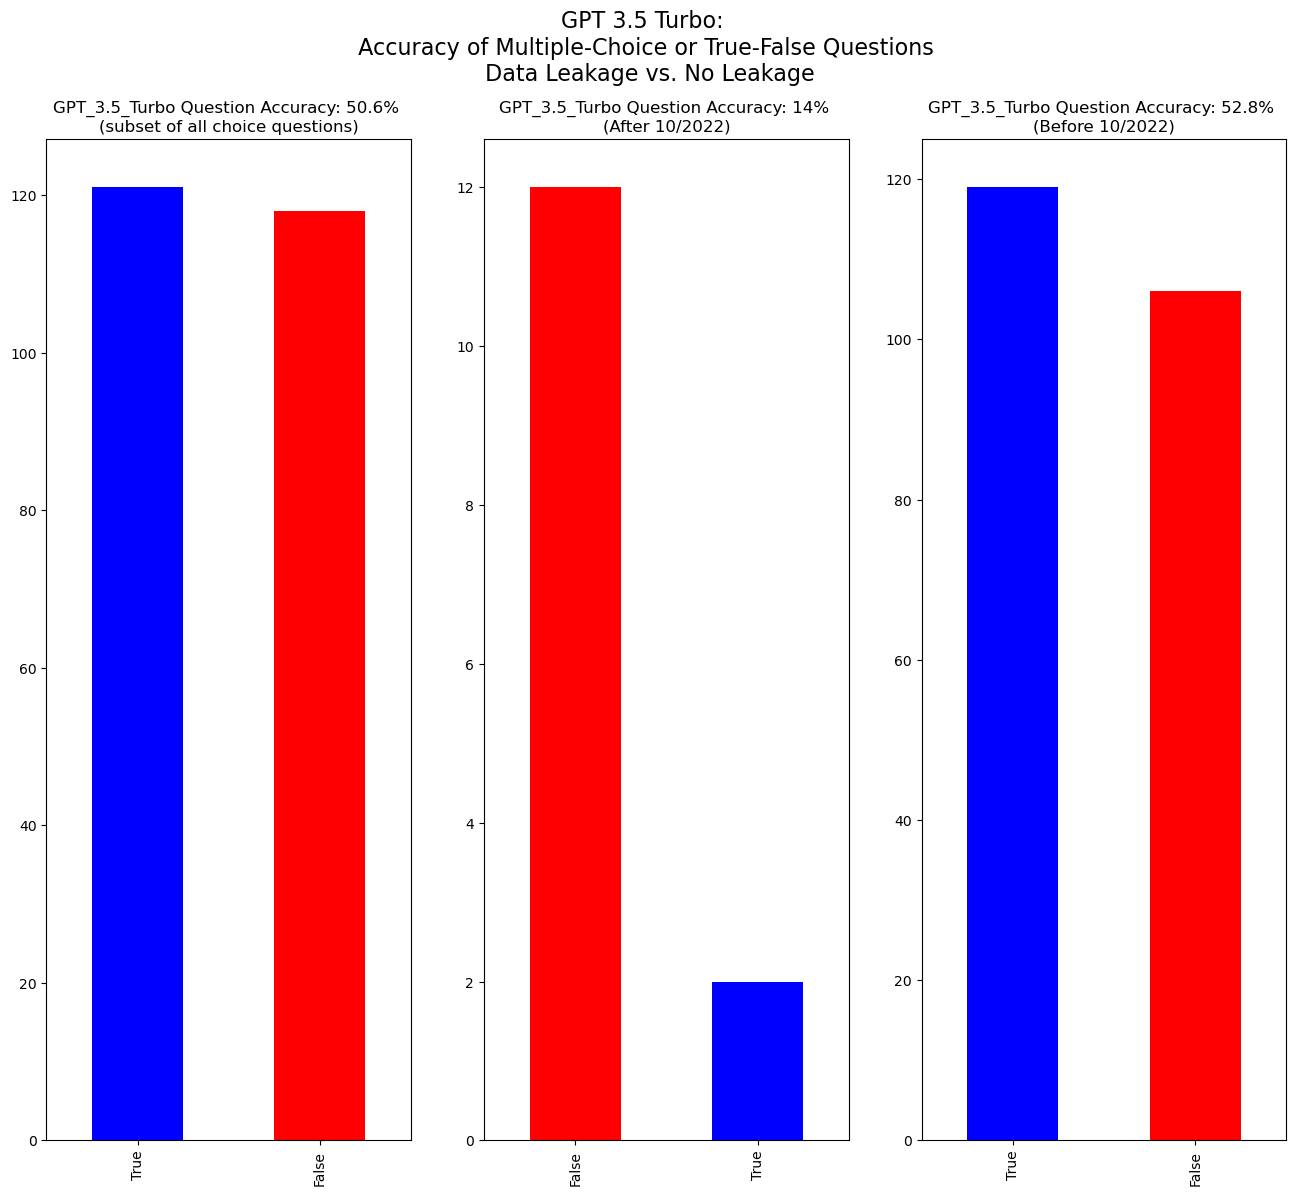

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (16,13))

fig.suptitle('GPT 3.5 Turbo: \n Accuracy of Multiple-Choice or True-False Questions \n Data Leakage vs. No Leakage', size = 16)
#add DataFrames to subplots
df_gpt_35_2['acc'].value_counts().plot(kind = 'bar', color = ['blue', 'red'], title = 'GPT_3.5_Turbo Question Accuracy: 50.6% \n(subset of all choice questions)', ax = axes[0])

df_gpt_35_2[df_gpt_35_2['Leakage Status Open'] == False]['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'GPT_3.5_Turbo Question Accuracy: 14% \n(After 10/2022)', ax = axes[1])

df_gpt_35_2[df_gpt_35_2['Leakage Status Open'] == True]['acc'].value_counts().plot(kind = 'bar', color = ['blue', 'red'], title = 'GPT_3.5_Turbo Question Accuracy: 52.8% \n(Before 10/2022)', ax = axes[2])


In [81]:
print(df_gpt_35_2['acc'].value_counts())
print(df_gpt_35_2[df_gpt_35_2['Leakage Status Open'] == False]['acc'].value_counts())
print(df_gpt_35_2[df_gpt_35_2['Leakage Status Open'] == True]['acc'].value_counts())

True     121
False    118
Name: acc, dtype: int64
False    12
True      2
Name: acc, dtype: int64
True     119
False    106
Name: acc, dtype: int64


In [105]:
df_gpt_35_2.shape

(239, 21)

## Testing Responses from Davinci

In [32]:
for i in ['num', 't/f', 'mc']:
    
    print(i, '\n')
    
    for j in range(10):
        
        shp = np.random.randint(df_davinci[df_davinci['qtype'] == i].shape[0])
        
        print(df_davinci[df_davinci['qtype'] == i].iloc[np.random.randint(shp)][['Answer', 'Base Answer', 'choices', 'acc']])
        

num 

Answer                                0.24182418241824202
Base Answer                             none of the above
choices        {'max': 10000, 'min': 1, 'deriv_ratio': 1}
acc                                                 False
Name: 658, dtype: object
Answer                                        0.7795834609479521
Base Answer                                                  max
choices        {'max': 1000000000, 'min': 1000, 'deriv_ratio'...
acc                                                        False
Name: 641, dtype: object
Answer                               0.574347826086956
Base Answer                          none of the above
choices        {'max': 25, 'min': 2, 'deriv_ratio': 1}
acc                                              False
Name: 1369, dtype: object
Answer                                0.567333333333333
Base Answer                                         max
choices        {'max': 40, 'min': 10, 'deriv_ratio': 1}
acc                                   

In [33]:
print(df_davinci[df_davinci['qtype']=='t/f']['acc'].value_counts())

print(df_davinci[df_davinci['qtype']=='mc']['acc'].value_counts())

print(df_davinci[df_davinci['qtype']=='num']['acc'].value_counts())

True     651
False    279
Name: acc, dtype: int64
False    259
True     155
Name: acc, dtype: int64
False    405
Name: acc, dtype: int64


In [82]:
df_davinci_2 = df_davinci[df_davinci['qtype']!= 'num']

print(df_davinci_2.shape)

(1344, 21)


<Axes: title={'center': 'Davinci_003 Question Accuracy: 43.5% \n(Before 10/2022)'}>

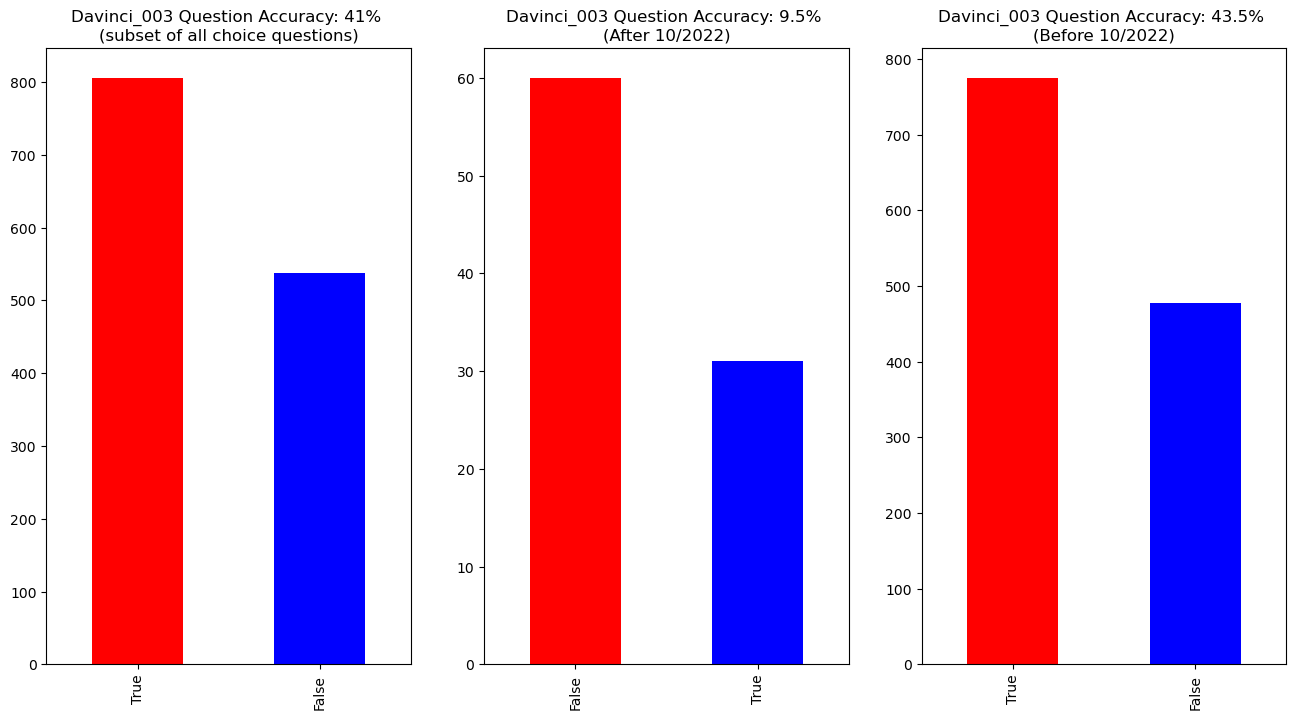

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (16,8))

#add DataFrames to subplots
df_davinci_2['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'Davinci_003 Question Accuracy: 40% \n(subset of all choice questions)', ax = axes[0])

df_davinci_2[df_davinci_2['Leakage Status Open'] == False]['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'Davinci_003 Question Accuracy: 9.5% \n(After 10/2022)', ax = axes[1])

df_davinci_2[df_davinci_2['Leakage Status Open'] == True]['acc'].value_counts().plot(kind = 'bar', color = ['red', 'blue'], title = 'Davinci_003 Question Accuracy: 43.5% \n(Before 10/2022)', ax = axes[2])


In [85]:
print(df_davinci_2['acc'].value_counts())
print(df_davinci_2[df_davinci_2['Leakage Status Open'] == False]['acc'].value_counts())
print(df_davinci_2[df_davinci_2['Leakage Status Open'] == True]['acc'].value_counts())

True     806
False    538
Name: acc, dtype: int64
False    60
True     31
Name: acc, dtype: int64
True     775
False    478
Name: acc, dtype: int64


In [86]:
538/(538+806)

0.40029761904761907

/var/folders/94/bxh7fj4x7yl9kbsd9mrp4n740000gn/T/ipykernel_49667/2038391529.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


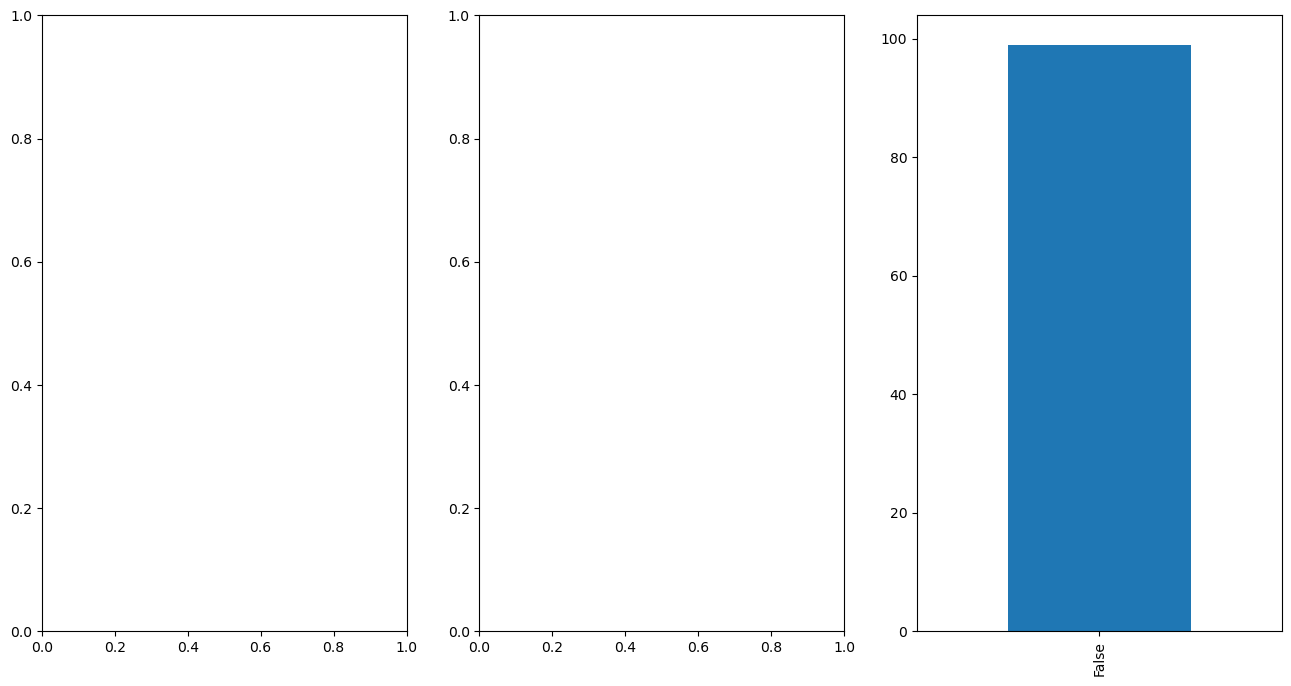

In [35]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16,8))

ax[0] = df_gpt_35[df_gpt_35['qtype'] == 't/f']['acc'].value_counts().plot(kind = 'bar')

ax[1] = df_gpt_35[df_gpt_35['qtype'] == 'mc']['acc'].value_counts().plot(kind = 'bar')

ax[2] = df_gpt_35[df_gpt_35['qtype'] == 'num']['acc'].value_counts().plot(kind = 'bar')


fig.show()

In [36]:
dir(fig)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_callbacks',
 '_canvas_callbacks',
 '_check_layout_engines_compat',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_default_contains',
 '_dpi',
 '_fig_callbacks',
 '_fully_clipped_to_axes',
 '_gci',
 '_get_dpi',
 '_get_draw_artists',
 '_get_renderer',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_label',
 '_layout_engine',
 '_localaxes',
 '_mouse_key_ids',
 '_mouseover',
 '_norm_per_subplot_kw',
 '_normalize_grid_string',
 

<Axes: >

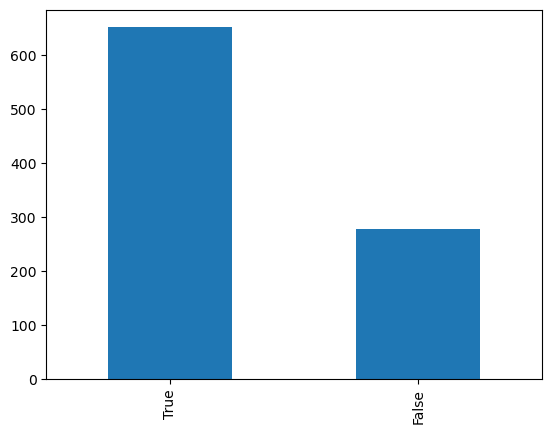

In [37]:
df_davinci[df_davinci['qtype'] == 't/f']['acc'].value_counts().plot(kind = 'bar')